Inclusive A coefficients

In [8]:
def theoretical_xs(A, ct, chhh, ctt, cggh, cgghh):
    theo_xs = (A[1]*pow(ct,4) + A[2]*pow(ctt,2) + A[3]*pow(ct,2)*pow(chhh,2) + A[4]*pow(cggh,2)*pow(chhh,2)
    + A[5]*pow(cgghh,2) + A[6]*ctt*pow(ct,2) + A[7]*pow(ct,3)*chhh + A[8]*ctt*ct*chhh
    + A[9]*ctt*cggh*chhh + A[10]*ctt*cgghh + A[11]*pow(ct,2)*cggh*chhh + A[12]*pow(ct,2)*cgghh
    + A[13]*ct*pow(chhh,2)*cggh + A[14]*ct*chhh*cgghh + A[15]*cggh*chhh*cgghh
    + A[16]*pow(ct,3)*cggh + A[17]*ct*ctt*cggh + A[18]*ct*pow(cggh,2)*chhh
    + A[19]*ct*cggh*cgghh + A[20]*pow(ct,2)*pow(cggh,2) + A[21]*ctt*pow(cggh,2)
    + A[22]*pow(cggh,3)*chhh + A[23]*pow(cggh,2)*cgghh)*0.03105*1000

    return theo_xs

A = ['nan', 2.2094924315126603, 11.27004543282802, 0.3342134543116734, 0.3519499327501594, 12.627699293750837, -9.194954384185928, -1.5437058858243338, 3.2643582248364877, 2.8124458065761666, 16.130267354673794, -1.264005110956851, -5.8215348315533575, 0.6493185211796064, 2.813489028660056, 3.176228016011767, -0.009143092524801921, 0.02337623472767128, 0.020696085493575267, 0.03417434298741243, -0.031131293322590674, 0.0779555008605974, 0.015194828048558593, 0.12053052981898134]


In [9]:
import matplotlib.pyplot as plt
import numpy as np

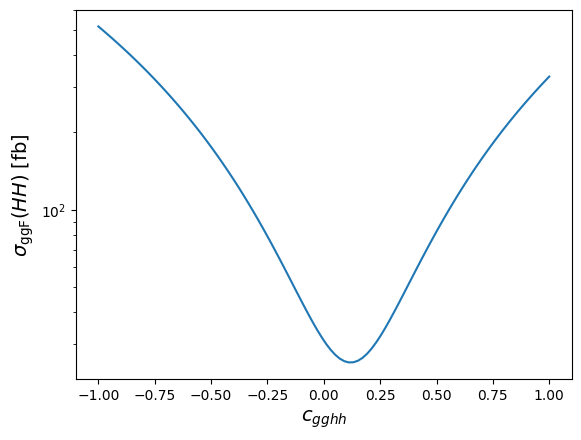

In [10]:
cgghh_values = np.linspace(-1, 1, 100)

# Calculate theoretical cross-sections for each value of cgghh
cross_sections = [theoretical_xs(A, 1., 1., 0., 0., cgghh) for cgghh in cgghh_values]

# Plot
plt.plot(cgghh_values, cross_sections, )
plt.xlabel('$c_{gghh}$', fontsize=14)
plt.yscale('log')
plt.ylabel('$\sigma_{\mathrm{ggF}}(HH)}$ [fb]', fontsize=14)
plt.title('')
plt.savefig('theoxsec_cgghh.pdf')
plt.show()


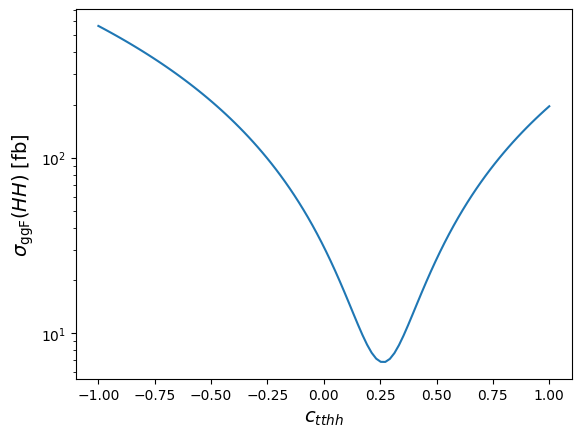

In [11]:
ctthh_values = np.linspace(-1, 1, 100)

# Calculate theoretical cross-sections for each value of ctthh
cross_sections = [theoretical_xs(A, 1., 1., ctthh, 0., 0.) for ctthh in ctthh_values]

# Plot
plt.plot(cgghh_values, cross_sections)
plt.xlabel('$c_{tthh}$', fontsize=14)
plt.yscale('log')
plt.ylabel('$\sigma_{\mathrm{ggF}}(HH)}$ [fb]', fontsize=14)
plt.title('')
plt.savefig('theoxsec_ctthh.pdf')
plt.show()


In [22]:
# ct=1 
# cggh=0
# chhh, ctt, cgghh=1, 0, 0
# print('SM', theoretical_xs(A, ct, chhh, ctt, cggh, cgghh), 'yields 29.09666421444013')

# cgghh=0
# chhh, ctt, cgghh= 23.02, -1.36, 0
# print('bestfit', theoretical_xs(A, ct, chhh, ctt, cggh, cgghh), ', yields 417.85')

# cgghh=0
# chhh, ctt, cgghh= 12.45, 0, -0.51
# print('bestfit', theoretical_xs(A, ct, chhh, ctt, cggh, cgghh), ', yields 118.88480060590308')

# cgghh=0
# chhh, ctt, cgghh= 8.10, 0, 0
# print('bestfit', theoretical_xs(A, ct, chhh, ctt, cggh, cgghh), ', yields 93.44594306159487')

SM 31.049999999999994 yields 29.09666421444013
bestfit 2326.645074313461 , yields 417.85
bestfit 719.8468635971967 , yields 118.88480060590308
bestfit 361.21146528014407 , yields 93.44594306159487


In [12]:
import ROOT

def get_roorealvar_values(var):
    min_val = var.getMin()
    max_val = var.getMax()
    num_bins = var.getBins()
    bin_width = (max_val - min_val) / num_bins
    values = [min_val + (i + 0.5) * bin_width for i in range(num_bins)]
    return values

def get_yields(w, cgghh,ctthh,chhh):
    iter = w.componentIterator()
    obj = iter.Next()
    w.var("mu_HH").setVal(1)
    try:
       w.var("cg").setVal(0)
    except:
        pass
    if cgghh is not None:
        try:
            w.var("cgghh").setVal(cgghh)
        except:
            w.var("c2g").setVal(cgghh)
    if ctthh is not None:
        try:
            w.var("ctthh").setVal(ctthh)
        except:
            w.var("c2").setVal(ctthh)
    if chhh is not None:
        try:
            w.var("chhh").setVal(chhh)
        except:
            w.var("kl").setVal(chhh)
    yields = 0
    while obj:
        if isinstance(obj, ROOT.RooRealSumPdf):
            obj_name = obj.GetName()
            if 'ggf_' in obj_name and '_model' in obj_name:
                cleanname = obj_name.replace("_model","")
                observable = w.obj(f"obs_x_{cleanname}")
                ind_yield = 0
                for i in get_roorealvar_values(observable):
                    observable.setVal(i)
                    ind_yield += obj.getVal() - w.obj(f"L_x_bkg_{cleanname}_overallSyst_x_StatUncert").getVal() * w.obj(f"binWidth_obs_x_{cleanname}_10").getVal()
                yields += ind_yield
        obj = iter.Next()
    return yields

def compare_yields(cgghh,ctthh,chhh,compare=True):
    name4 = 'param_ctthh_cgghh_chhh_v4.root'
    f4 = ROOT.TFile(f"/Users/zhangrui/Downloads/{name4}", "READ")
    w4 = f4.Get("combined")
    y4 = get_yields(w4, cgghh,ctthh,chhh)
    if compare:
        name2 = 'param_ctthh_cgghh_chhh_v2.root'
        f2 = ROOT.TFile(f"/Users/zhangrui/Downloads/{name2}", "READ")
        w2 = f2.Get("combined")
        y2 = get_yields(w2, cgghh,ctthh,chhh)
        print(y2, y4)
    return y4

In [13]:
ct=1 
cggh=0

chhh, ctt, cgghh=1, 0, 0
xs, yie = theoretical_xs(A, ct, chhh, ctt, cggh, cgghh), 29.09666421444013
print('bestfit', xs, 'yield', yie, xs/yie)

chhh, ctt, cgghh= 23.02, -1.36, 0
xs, yie = theoretical_xs(A, ct, chhh, ctt, cggh, cgghh), 417.85
print('bestfit', xs, 'yield', yie, xs/yie)

chhh, ctt, cgghh= 12.45, 0, -0.51
xs, yie = theoretical_xs(A, ct, chhh, ctt, cggh, cgghh), 118.88480060590308
print('bestfit', xs, 'yield', yie, xs/yie)

chhh, ctt, cgghh= 8.10, 0, 0
xs, yie = theoretical_xs(A, ct, chhh, ctt, cggh, cgghh), 93.44594306159487
print('bestfit', xs, 'yield', yie, xs/yie)


bestfit 31.049999999999994 yield 29.09666421444013 1.067132636619921
bestfit 2326.645074313461 yield 417.85 5.568134675872828
bestfit 719.8468635971967 yield 118.88480060590308 6.054994918849648
bestfit 361.21146528014407 yield 93.44594306159487 3.8654590391586248


In [14]:
# chhh, ctt, cgghh= 12.45, 0, -0.51
# compare_yields(cgghh,ctt,chhh)

In [15]:
chhh_range = np.linspace(-10, 20, 10)
cgghh_range = np.linspace(-1, 0.5, 10)
chhh_grid, cgghh_grid = np.meshgrid(chhh_range, cgghh_range)
chhh_grid.size, cgghh_grid.size

(100, 100)

In [ ]:
ctt=0
ct=1 
cggh=0
yields_all = []
xs_all = []
# for chhh,cgghh in zip(chhh_grid.flatten(), cgghh_grid.flatten()):
#     xs = theoretical_xs(A, ct, chhh, ctt, cggh, cgghh)
#     name4 = 'param_ctthh_cgghh_chhh_v4.root'
#     f4 = ROOT.TFile(f"/Users/zhangrui/Downloads/{name4}", "READ")
#     w4 = f4.Get("combined")
#     yie = get_yields(w4, cgghh,ctt,chhh)
#     # yie = compare_yields(cgghh,ctt,chhh,False)
#     yields_all.append(yie)
#     xs_all.append(xs)
#     print(chhh,cgghh,xs,yie)

chhh = 1
for cgghh in np.linspace(-1, 1, 20):
    xs = theoretical_xs(A, ct, chhh, ctt, cggh, cgghh)
    name4 = 'param_ctthh_cgghh_chhh_v4.root'
    f4 = ROOT.TFile(f"/Users/zhangrui/Downloads/{name4}", "READ")
    w4 = f4.Get("combined")
    yie = get_yields(w4, cgghh,ctt,chhh)
    # yie = compare_yields(cgghh,ctt,chhh,False)
    yields_all.append(yie)
    xs_all.append(xs)
    print(chhh,cgghh,xs,yie)


-10.0 -1.0 3032.095256174312 1669.219036774329
-6.666666666666666 -1.0 2004.607373837541 1229.3112640643053
-3.333333333333333 -1.0 1207.7267749758248 873.0408530053662
0.0 -1.0 641.4534595891633 600.4078035975124
3.333333333333334 -1.0 305.78742767755614 411.41211584074364
6.666666666666668 -1.0 200.72867924100387 306.0537897350599
10.0 -1.0 326.27721427950604 284.33282528046146
13.333333333333336 -1.0 682.433032793063 346.24922247694826
16.666666666666668 -1.0 1269.1961347816748 491.80298132452003
20.0 -1.0 2086.566520245341 720.9941018231764
-10.0 -0.8333333333333334 2736.5654591384045 1438.9845433422443
-6.666666666666666 -0.8333333333333334 1757.6102625460194 1023.5534871263533
-3.333333333333333 -0.8333333333333334 1009.2623494286894 691.7597925615485
0.0 -0.8333333333333334 491.5217197864137 443.60345964782846
3.333333333333334 -0.8333333333333334 204.38837361919258 279.08448838519354
6.666666666666668 -0.8333333333333334 147.86231092702624 198.2028787736438
10.0 -0.833333333333

: 

In [6]:
z = (np.array(yields_all)/np.array(xs_all)).reshape((cgghh_range.size,chhh_range.size))
plt.contour(chhh_range, cgghh_range, z, colors='k')
cntr1 = plt.contourf(chhh_range, cgghh_range, z, levels=14, cmap="RdBu")
plt.colorbar(cntr1)

NameError: name 'yields_all' is not defined

In [ ]:
z.shape, z

((10, 10),
 array([[0.62776119, 0.70495804, 0.82817847, 1.03323271, 1.34190673,
         1.49980329, 1.07780709, 0.64138026, 0.44169315, 0.36076473],
        [0.59545512, 0.66753493, 0.78867949, 1.00686729, 1.35094562,
         1.33626288, 0.73538634, 0.42868153, 0.33101075, 0.30072682],
        [0.56312569, 0.62837782, 0.74416232, 0.97301607, 1.33592444,
         0.95750203, 0.41595689, 0.2883543 , 0.26699284, 0.26879144],
        [0.53293734, 0.59044215, 0.69791004, 0.93231258, 1.21552559,
         0.43888227, 0.22563282, 0.22443016, 0.242833  , 0.25970283],
        [0.50862445, 0.56010085, 0.66127072, 0.90125014, 0.78217748,
         0.15220983, 0.17781989, 0.21963744, 0.24815481, 0.26769969],
        [0.4962456 , 0.54973855, 0.66513585, 0.96740448, 0.41757744,
         0.17949124, 0.21948338, 0.25156357, 0.27285337, 0.28755623],
        [0.50487383, 0.5803929 , 0.77263474, 1.26559783, 0.57400818,
         0.32021664, 0.29829294, 0.30216242, 0.30887395, 0.31503112],
        [0.54646

In [ ]:
chhh = 3.1111111111111107
cgghh = -0.5666666666666667 
ct = 1
ctt = 0

xs = theoretical_xs(A, ct, chhh, ctt, cggh, cgghh)
yie = compare_yields(cgghh,ctt,chhh,False)
print(chhh,cgghh,xs, yie, yie/xs)

3.1111111111111107 -0.5666666666666667 94.24902663764495 127.3253098608179 1.350945621436918
